In [4]:
import csv

def parse_block(block):
    """Parse a single block of data and return a dictionary."""
    data = {
        "#*": None,
        "#@": None,
        "#t": None,
        "#c": None,
        "#index": None,
        "#%": [],
        "#!": None,
    }

    append_reference = data["#%"].append
    for line in block:
        if line.startswith("#%"):
            append_reference(line[2:].strip())
        elif line.startswith("#index"):
            data["#index"] = line[6:].strip()
        else:
            key = line[0:2]
            if key in data:
                data[key] = line[2:].strip()

    return data


def process_large_file(file_path, csv_file):
    """Process a large file in chunks."""
    block = []
    with open(file_path, "r", encoding="utf-8") as file, open(csv_file, 'w', newline='', encoding="utf-8") as outcsv:
        writer = csv.writer(outcsv)
        writer.writerow(["Title", "Authors", "Year", "Venue", "ID", "References", "Abstract"])
        startswith = str.startswith
        for line in file:
            if startswith(line, "#*") and block:
                writer.writerow(list(parse_block(block).values()))
                block = []
            block.append(line)
        writer.writerow(list(parse_block(block).values()))  # process the last block

# usage
process_large_file("acm.txt", "output.csv")


 ## A. Compute the number of distinct authors, publication venues, publications, and citations/references

Please perform the following computations on the dataset of publications:

1. Compute the number of distinct authors present in the dataset.
2. Calculate the count of distinct publication venues.
3. Determine the total number of publications in the dataset.
4. Calculate the count of citations or references across all publications.

Please provide the results for further analysis and reporting.



In [5]:
import pandas as pd
import ast

# load the data
df = pd.read_csv('output.csv')

# split the authors by ', ' and flatten the list
authors = [author for sublist in df['Authors'].dropna().str.split(', ').tolist() for author in sublist]

# get the publication venues, titles (publications), and references
venues = df['Venue'].dropna().tolist()
publications = df['Title'].dropna().tolist()
references = [ref for sublist in df['References'].dropna().apply(ast.literal_eval).tolist() for ref in sublist]

# compute the number of distinct authors, publication venues, publications, and citations/references
num_distinct_authors = len(set(authors))
num_distinct_venues = len(set(venues))
num_distinct_publications = len(set(publications))
num_distinct_references = len(set(references))

print(f'Number of distinct authors: {num_distinct_authors}')
print(f'Number of distinct publication venues: {num_distinct_venues}')
print(f'Number of distinct publications: {num_distinct_publications}')
print(f'Number of distinct references: {num_distinct_references}')


Number of distinct authors: 1656411
Number of distinct publication venues: 273328
Number of distinct publications: 2183550
Number of distinct references: 1007495


In [6]:
df.head()

,Title,Authors,Year,Venue,ID,References,Abstract
0,MOSFET table look-up models for circuit simula...,NaN,1984.0,"Integration, the VLSI Journal",1,[],NaN
1,The verification of the protection mechanisms ...,Virgil D. Gligor,1984.0,International Journal of Parallel Programming,2,[],NaN
2,Another view of functional and multivalued dep...,"M. Gyssens, J. Paredaens",1984.0,International Journal of Parallel Programming,3,[],NaN
3,Entity-relationship diagrams which are in BCNF,"Sushil Jajodia, Peter A. Ng, Frederick N. Spri...",1984.0,International Journal of Parallel Programming,4,[],NaN
4,The computer comes of age,Rene Moreau,1984.0,The computer comes of age,5,[],NaN


## B. Are these numbers likely to be accurate? Analysis of publication venue names

As a part of your analysis, investigate the publication venue names associated with the conference "Principles and Practice of Knowledge Discovery in Databases" in the dataset. Consider the following:

1. Filter the dataset based on the conference name to retrieve relevant publications.
2. Examine the publication venue names associated with the conference.
3. Analyze the venue names to identify any discrepancies, inconsistencies, or patterns.
4. Evaluate whether the numbers obtained for distinct publication venues are likely to be accurate based on your analysis.

Please provide your observations and insights regarding the accuracy and consistency of the publication venue names associated with the mentioned conference.



In [10]:
target_venue = 'Principles and Practice of Knowledge Discovery in Databases'
related_publications = df[df['Venue'].str.contains(target_venue, na=False)]
related_publications



,Title,Authors,Year,Venue,ID,References,Abstract
799594,Summarization of dynamic content in web collec...,"Adam Jatowt, Mitsuru Ishizuka",2004.0,PKDD '04 Proceedings of the 8th European Confe...,799596,"['168250', '207271', '217577', '272248', '2876...",This paper describes a new research proposal o...
799731,Proceedings of the 8th European Conference on ...,"Jean-François Boulicaut, Floriana Esposito, Fo...",2004.0,PKDD '04 Proceedings of the 8th European Confe...,799733,[],NaN
799732,Random matrices in data analysis,Dimitris Achlioptas,2004.0,PKDD '04 Proceedings of the 8th European Confe...,799734,[],We show how carefully crafted random matrices ...
799733,Data privacy,Rakesh Agrawal,2004.0,PKDD '04 Proceedings of the 8th European Confe...,799735,[],There is increasing need to build information ...
799734,Breaking through the syntax barrier: searching...,Soumen Chakrabarti,2004.0,PKDD '04 Proceedings of the 8th European Confe...,799736,[],The next wave in search technology will be dri...
...,...,...,...,...,...,...,...
1673597,Speeding up logistic model tree induction,"Marc Sumner, Eibe Frank, Mark Hall",2005.0,PKDD'05 Proceedings of the 9th European confer...,1673618,"['136349', '290481', '810934', '2135000']",Logistic Model Trees have been shown to be ver...
1673598,A random method for quantifying changing distr...,"Haixun Wang, Jian Pei",2005.0,PKDD'05 Proceedings of the 9th European confer...,1673619,"['115607', '342599', '400846', '424996', '4436...",In applications such as fraud and intrusion de...
1673599,Deriving class association rules based on leve...,"Takashi Washio, Koutarou Nakanishi, Hiroshi Mo...",2005.0,PKDD'05 Proceedings of the 9th European confer...,1673620,"['210159', '248791', '397383', '466482', '4812...",Most approaches of Class Association Rule (CAR...
1673600,An incremental algorithm for mining generators...,"Lijun Xu, Kanglin Xie",2005.0,PKDD'05 Proceedings of the 9th European confer...,1673621,"['280466', '464203', '466663', '481289', '5113...",This paper presents an efficient algorithm for...


## C

In [11]:
# Split the 'Authors' column into individual authors
df['Authors'] = df['Authors'].str.split(', ')

# Explode the DataFrame on the 'Authors' column, so that each author gets their own row
exploded_df = df.explode('Authors')

# Group by author and count the number of publications
publications_per_author = exploded_df.groupby('Authors').size()

# Display the result
print(publications_per_author)


Authors
                              32
  Fructuoso Amorim             1
  Xiaofei Liao                 1
 1                             1
 3DTotal Team                  6
                              ..
Ștefan Stănciulescu            1
Аsen Аsenov                    1
౹rpád Furka                    1
脡ric Lenormand                 1
脥bero Camilo Kreps Ben铆tez     1
Length: 1656411, dtype: int64


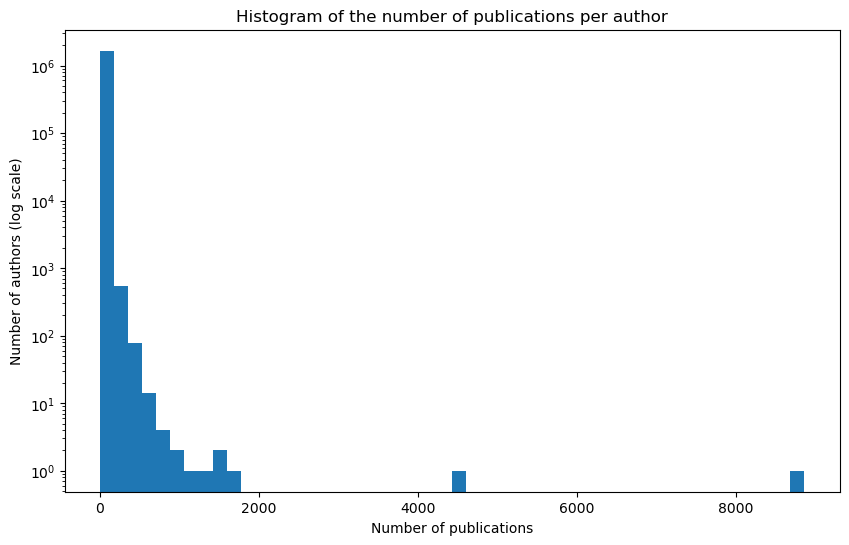

In [12]:
import matplotlib.pyplot as plt

# Plot the histogram (use log scale on the y-axis)
plt.figure(figsize=(10, 6))
plt.hist(publications_per_author, bins=50, log=True)
plt.xlabel('Number of publications')
plt.ylabel('Number of authors (log scale)')
plt.title('Histogram of the number of publications per author')
plt.show()


## D    

In [13]:
# Already calculated publications per author in the previous question
# publications_per_author = exploded_df.groupby('Authors').size()

# Get statistical summary
summary = publications_per_author.describe()

# Print the desired statistics
mean = summary['mean']
std_dev = summary['std']
q1 = summary['25%']
median = summary['50%']
q3 = summary['75%']

print(f"Mean number of publications per author: {mean}")
print(f"Standard deviation of number of publications per author: {std_dev}")
print(f"Q1 value of number of publications per author: {q1}")
print(f"Median number of publications per author: {median}")
print(f"Q3 value of number of publications per author: {q3}")


Mean number of publications per author: 3.4522422273216007
Standard deviation of number of publications per author: 12.727008452846384
Q1 value of number of publications per author: 1.0
Median number of publications per author: 1.0
Q3 value of number of publications per author: 3.0


Mean number of publications per venue: 8.725351958086987
Standard deviation of number of publications per venue: 106.78905171576673
Q1 value of number of publications per venue: 1.0
Median number of publications per venue: 1.0
Q3 value of number of publications per venue: 1.0


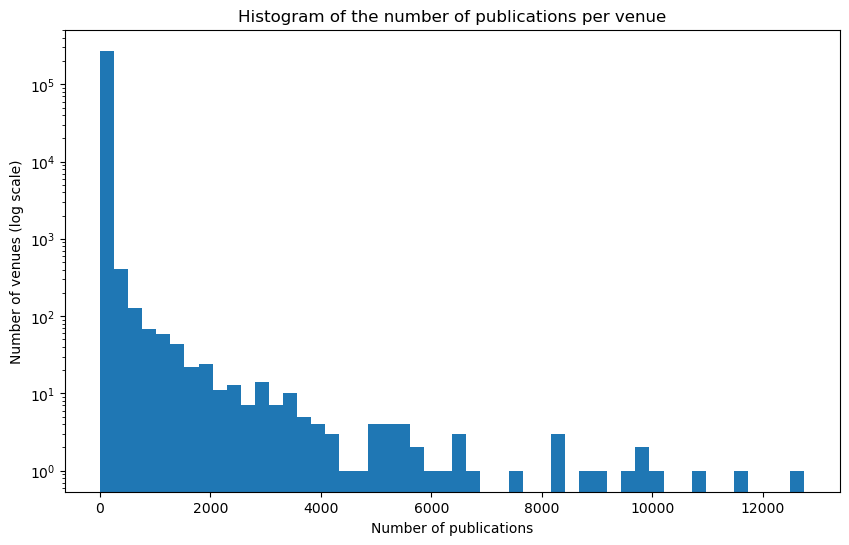

Venue with the largest number of publications: IEEE Transactions on Information Theory


In [14]:
# Group by venue and count the number of publications
publications_per_venue = df.groupby('Venue').size()

# Get statistical summary
summary_venue = publications_per_venue.describe()

# Print the desired statistics
mean_venue = summary_venue['mean']
std_dev_venue = summary_venue['std']
q1_venue = summary_venue['25%']
median_venue = summary_venue['50%']
q3_venue = summary_venue['75%']

print(f"Mean number of publications per venue: {mean_venue}")
print(f"Standard deviation of number of publications per venue: {std_dev_venue}")
print(f"Q1 value of number of publications per venue: {q1_venue}")
print(f"Median number of publications per venue: {median_venue}")
print(f"Q3 value of number of publications per venue: {q3_venue}")

# Plot the histogram (use log scale on the y-axis)
plt.figure(figsize=(10, 6))
plt.hist(publications_per_venue, bins=50, log=True)
plt.xlabel('Number of publications')
plt.ylabel('Number of venues (log scale)')
plt.title('Histogram of the number of publications per venue')
plt.show()

# Find the venue with the maximum number of publications
max_publications_venue = publications_per_venue.idxmax()
print(f"Venue with the largest number of publications: {max_publications_venue}")


## F

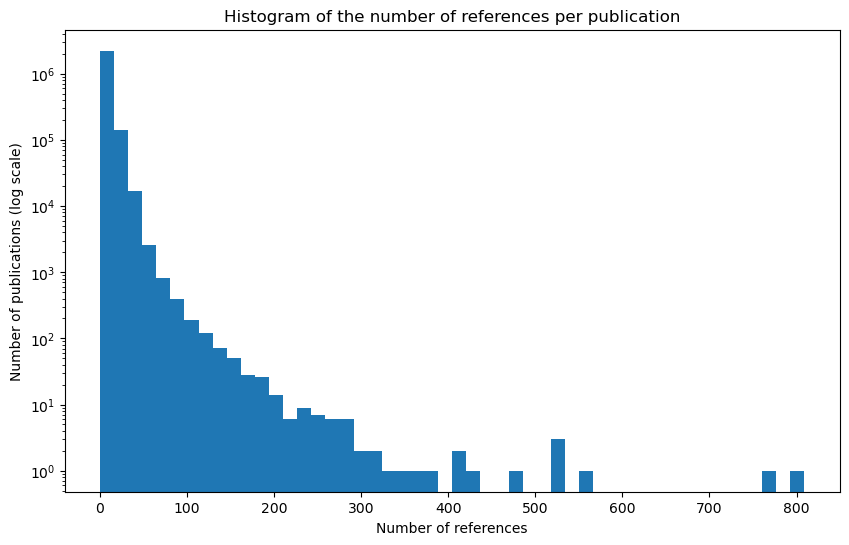

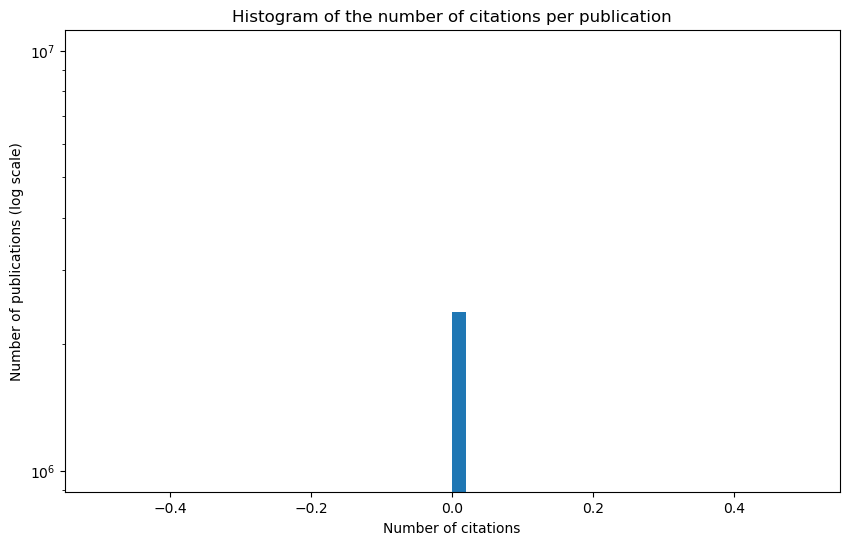

Publication with the largest number of references: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles
Publication with the largest number of citations: MOSFET table look-up models for circuit simulation


In [15]:
import ast

# Convert references to integers
df['References'] = df['References'].apply(lambda x: ast.literal_eval(x))

# Count the number of references per publication
df['NumReferences'] = df['References'].apply(len)

# Count the number of citations per publication
df['NumCitations'] = df['ID'].map(df['References'].explode().value_counts())

# Replace missing citation counts with 0
df['NumCitations'].fillna(0, inplace=True)

# Plot the histogram of the number of references per publication
plt.figure(figsize=(10, 6))
plt.hist(df['NumReferences'], bins=50, log=True)
plt.xlabel('Number of references')
plt.ylabel('Number of publications (log scale)')
plt.title('Histogram of the number of references per publication')
plt.show()

# Plot the histogram of the number of citations per publication
plt.figure(figsize=(10, 6))
plt.hist(df['NumCitations'], bins=50, log=True)
plt.xlabel('Number of citations')
plt.ylabel('Number of publications (log scale)')
plt.title('Histogram of the number of citations per publication')
plt.show()

# Find the publication with the maximum number of references
max_references_publication = df.loc[df['NumReferences'].idxmax(), 'Title']
print(f"Publication with the largest number of references: {max_references_publication}")

# Find the publication with the maximum number of citations
max_citations_publication = df.loc[df['NumCitations'].idxmax(), 'Title']
print(f"Publication with the largest number of citations: {max_citations_publication}")


## G

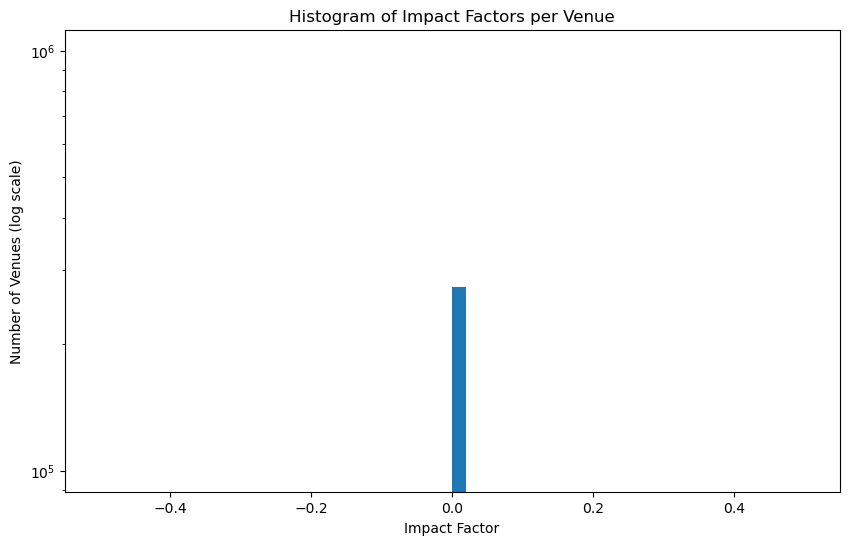

In [16]:
# Calculate the total number of citations per venue
total_citations_per_venue = df.groupby('Venue')['NumCitations'].sum()

# Calculate the number of publications per venue
num_publications_per_venue = df.groupby('Venue').size()

# Calculate the impact factor per venue
impact_factor_per_venue = total_citations_per_venue / num_publications_per_venue

# Plot the histogram of impact factors
plt.figure(figsize=(10, 6))
plt.hist(impact_factor_per_venue, bins=50, log=True)
plt.xlabel('Impact Factor')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Impact Factors per Venue')
plt.show()


## H

In [17]:
highest_impact_venue = impact_factor_per_venue.idxmax()
print(f"Venue with the highest apparent impact factor: {highest_impact_venue}")


Venue with the highest apparent impact factor: !%@ (4th ed.): a directory of electronic mail addressing & networks


## I

In [18]:
# Filter venues with at least 10 publications
filtered_df = df.groupby('Venue').filter(lambda x: len(x) >= 10)

# Group by author and count the number of publications
publications_per_author_filtered = filtered_df.groupby('Authors').size()

# Get statistical summary
summary_filtered = publications_per_author_filtered.describe()

# Print the desired statistics
mean_filtered = summary_filtered['mean']
std_dev_filtered = summary_filtered['std']
q1_filtered = summary_filtered['25%']
median_filtered = summary_filtered['50%']
q3_filtered = summary_filtered['75%']

print(f"Mean number of publications per author (venues with at least 10 publications): {mean_filtered}")
print(f"Standard deviation of number of publications per author (venues with at least 10 publications): {std_dev_filtered}")
print(f"Q1 value of number of publications per author (venues with at least 10 publications): {q1_filtered}")
print(f"Median number of publications per author (venues with at least 10 publications): {median_filtered}")
print(f"Q3 value of number of publications per author (venues with at least 10 publications): {q3_filtered}")

# Plot the histogram (use log scale on the y-axis)
plt.figure(figsize=(10, 6))
plt.hist(publications_per_author_filtered, bins=50, log=True)
plt.xlabel('Number of publications')
plt.ylabel('Number of authors (log scale)')
plt.title('Histogram of the number of publications per author (venues with at least 10 publications)')
plt.show()


TypeError: unhashable type: 'list'

In [19]:
highest_impact_venue_citations = df[df['Venue'] == highest_impact_venue]['NumCitations']
print(f"Citation counts for publications from the venue with the highest impact factor:")
print(highest_impact_venue_citations)


Citation counts for publications from the venue with the highest impact factor:
160019    0.0
Name: NumCitations, dtype: float64


In [20]:
impact_factor_filtered = highest_impact_venue_citations.mean()
median_citations_filtered = highest_impact_venue_citations.median()

print(f"Impact factor (mean number of citations) for the venue with the highest impact factor: {impact_factor_filtered}")
print(f"Median number of citations for the venue with the highest impact factor: {median_citations_filtered}")


Impact factor (mean number of citations) for the venue with the highest impact factor: 0.0
Median number of citations for the venue with the highest impact factor: 0.0


## J

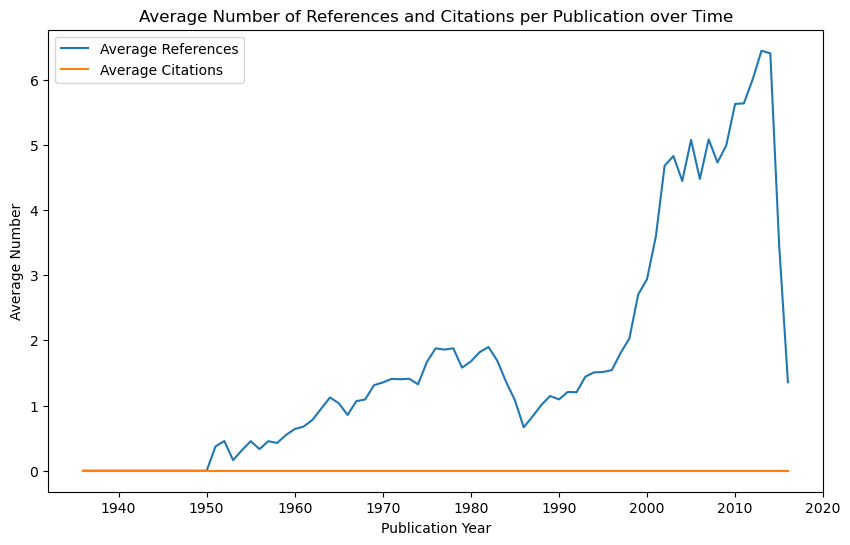

In [21]:
# Group the data by publication year and calculate the average number of references and citations per publication
avg_references_per_year = df.groupby('Year')['NumReferences'].mean()
avg_citations_per_year = df.groupby('Year')['NumCitations'].mean()

# Plot the average number of references and citations per publication as a function of time
plt.figure(figsize=(10, 6))
plt.plot(avg_references_per_year.index, avg_references_per_year, label='Average References')
plt.plot(avg_citations_per_year.index, avg_citations_per_year, label='Average Citations')
plt.xlabel('Publication Year')
plt.ylabel('Average Number')
plt.title('Average Number of References and Citations per Publication over Time')
plt.legend()
plt.show()
